## _PandaML_

- Perform detailed Exploratory Data Analysis on STT Data.

In [1]:
import os
import glob
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import trackml.dataset
import tensorflow as tf
import seaborn as sns

## Dataset

In [3]:
# path to the dataset
path = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [4]:
# select an event
event_id = 2

In [5]:
# load event using trackml.dataset (update: pandaroot will now generate tubes.csv as cells.csv)
event_prefix = str('event{!s}'.format(format(event_id, '010d')))
prefix = path + str('event{!s}'.format(format(event_id, '010d')))
hits, tubes, particles, truth = trackml.dataset.load_event(prefix)

mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event0000000002 memory usage 0.01 MB


In [6]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-6.12280,-15.655000,35.0,9,0,48
1,2,-6.99749,-16.160000,35.0,9,1,154
2,3,-6.99749,-17.170000,35.0,9,2,267
3,4,-7.87217,-17.674999,35.0,9,3,385
4,5,-7.87217,-18.684999,35.0,9,4,510


In [7]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.062153,15273000.0,15.27300,9,0,48,0,2
1,2,0.485507,2901860.0,2.90186,9,1,154,0,2
2,3,0.084492,12518600.0,12.51860,9,2,267,0,2
3,4,0.366787,6127680.0,6.12768,9,3,385,0,2
4,5,0.218553,14618900.0,14.61890,9,4,510,0,2


In [8]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,0.000000,-0.000000,1.642000,0,1,88888,0
1,2,0.0,0.0,0.0,-0.080749,-0.009465,0.498454,0,1,2212,0
2,3,0.0,0.0,0.0,-0.097025,0.039273,0.212149,0,1,-211,0
3,4,0.0,0.0,0.0,0.201635,0.091849,0.697453,0,1,-2212,0
4,5,0.0,0.0,0.0,-0.023861,-0.121658,0.233945,0,1,211,0


In [9]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-6.13515,-15.647600,31.807100,-0.062007,-0.103075,0.224405,0.0,5
1,2,-6.60323,-16.410000,33.474800,-0.064706,-0.101951,0.224082,0.0,5
2,3,-7.06991,-17.121700,35.050701,-0.066850,-0.100841,0.223882,0.0,5
3,4,-7.58211,-17.876499,36.736900,-0.069040,-0.099612,0.223697,0.0,5
4,5,-8.05966,-18.549700,38.261200,-0.070896,-0.098117,0.223732,0.0,5


## Truth
The truth file contains the mapping between hits and generating particles and the true particle state at each measured hit. Each entry maps one hit to one particle.  
* __hit_id__: numerical identifier of the hit as defined in the hits file.
* __particle_id__: numerical identifier of the generating particle as defined in the particles file. A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.
* __tx, ty, tz__ true intersection point in global coordinates (in millimeters) between the particle trajectory and the sensitive surface.
* __tpx, tpy, tpz__ true particle momentum (in GeV/c) in the global coordinate system at the intersection point. The corresponding vector is tangent to the particle trajectory at the intersection point.
* __weight__ per-hit weight used for the scoring metric; total sum of weights within one event equals to one.

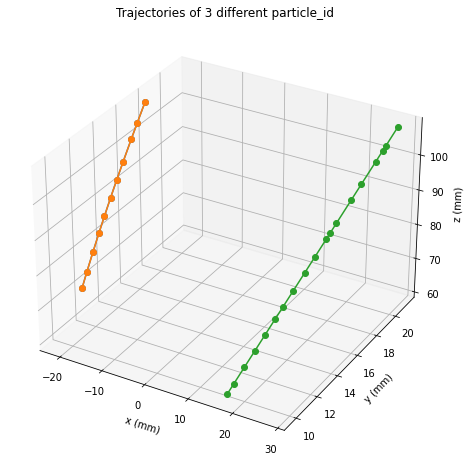

In [31]:

# For starters, let's see some trajectories from the truth dataset.

#get the information for some particles
truth_0 = truth[truth.particle_id == particles.iloc[1,0]]
truth_1 = truth[truth.particle_id == particles.iloc[1,0]]
truth_2 = truth[truth.particle_id == particles.iloc[3,0]]

#create figure instance
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#plot each particle's path
ax.plot(
    xs=truth_0.tx,
    ys=truth_0.ty,
    zs=truth_0.tz, marker='o')

ax.plot(
    xs=truth_1.tx,
    ys=truth_1.ty,
    zs=truth_1.tz, marker='o')

ax.plot(
    xs=truth_2.tx,
    ys=truth_2.ty,
    zs=truth_2.tz, marker='o')

ax.set_title('Trajectories of 3 different particle_id')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.show()

## Let's plot some particle tracks

In [1]:
# Get every 100th particle
tracks = truth.particle_id.unique()[1::4]

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)

ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()

NameError: name 'truth' is not defined